In [262]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.metrics import confusion_matrix
from pywaffle import Waffle
import numpy as np
import math
import itertools

In [2]:
prec = 0.87
recall = 0.37

In [3]:
# (prec - 1) * tp + prec * fp = 0
#(recall - 1) * tp + recall * fn = 0 
# tp + fp + fn + tn = 1

In [172]:
y_true = [0, 0, 1, 1, 0, 1, 1, 0, 0]
y_pred = [0, 0, 0, 0, 1, 1, 1, 0, 0]
cm = confusion_matrix(y_true, y_pred)

In [173]:
cm

array([[4, 1],
       [2, 2]])

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


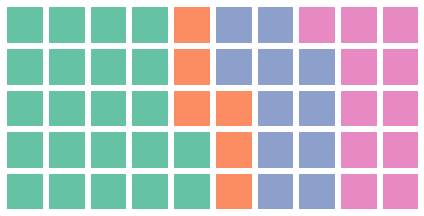

In [6]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,  # Either rows or columns could be omitted
    values=cm.ravel()
)
fig.show()

In [7]:
tn, fp, fn, tp = cm.ravel()

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


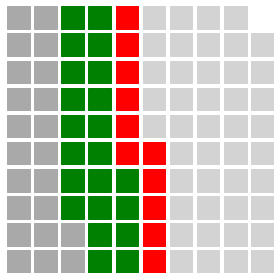

In [8]:
reordered = [fn, tp, fp, tn]
colors=["darkgrey", "green", "red", "lightgrey"]
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=10,  # Either rows or columns could be omitted
    values=reordered,
    colors=["darkgrey", "green", "red", "lightgrey"]
)
fig.show()

<class 'pywaffle.waffle.Waffle'>


/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


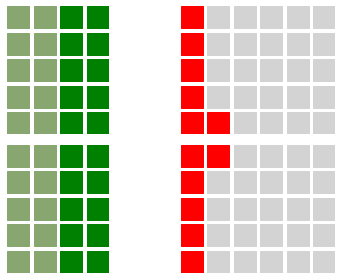

In [9]:
reordered = [fn, tp, fp, tn]
colors=["#88a770", "green", "red", "lightgrey"]

rows = 10
cols = 10
col_ratio = (fn+tp)/sum(reordered)
col_part = int(round(cols * col_ratio))

fig = plt.figure(
    FigureClass=Waffle,
    rows=rows // 2,
      # Either rows or columns could be omitted
    plots = {
        "221": {
            'values':[n/2 for n in reordered[:2] ],
            'starting_location': "NW",
            "colors": colors[:2],
            "columns": col_part,
        },
        "223": {
            'values':[n/2 for n in reordered[:2] ],
            'starting_location': "SW",
            "colors": colors[:2],
            "columns": col_part,
        },
        
        "222": {
            'values':[n/2 for n in reordered[2:] ],
            'starting_location': "SW",
            "colors": colors[2:],
            "columns": cols - col_part,
        },
        "224": {
            'values':[n/2 for n in reordered[2:] ],
            'starting_location': "NW",
            "colors": colors[2:],
            "columns": cols - col_part,
        },
        
    },
    #values=[fn/2, tp/2],
    
    vertical=False,
)

print(fig.__class__)

fig.show()

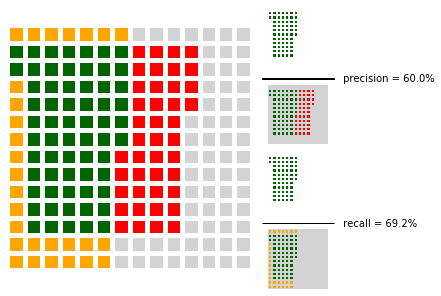

In [336]:

def build_waffle_matrix(size, confusion_matrix):
    rows, cols = size
    #print(f"{size}")
    hmap = np.ones( (rows, cols) )
    tn, fp, fn, tp = cm.ravel()
    
    fn_tp_boxes = (fn+tp) * cols * rows // sum(cm.ravel())    

    for n in range(fn_tp_boxes, rows * cols):
        ix = n % rows
        iy = n // rows
        hmap[ix, iy] = 4
    normalize =  rows * cols / sum(cm.ravel())
    col_ratio = (fn+tp)/sum(cm.ravel())
    col_part = cols * col_ratio
    h = int(min(
        max( math.ceil(tp/col_part * normalize), 
            math.ceil(fp / (cols - col_part) * normalize ))+1,
        rows))
    
    centerx = int(round(rows / 2))
    centery = int(round(col_part))

    midh = int(math.ceil(h/2))
    tp_boxes = int(math.floor(tp * cols * rows / sum(cm.ravel())))
    fp_boxes = int(math.floor(fp * cols * rows / sum(cm.ravel())))

    def boxes_generator(direction=-1, expected_value=1):
        n = 0
        while (True):
            ix = min(centerx - midh + (n % (h)), rows - 1)
            iy = min(centery + direction * (n// (h) -1), cols - 1)
            n += 1
            if hmap[ix, iy] == expected_value:
                yield ix, iy
                
    tp_boxes_gen = boxes_generator(direction=-1, expected_value=1)
    #print(f"tp_boxes = {tp_boxes}")
    toUpdate = itertools.islice(tp_boxes_gen, tp_boxes)        
    for xy in toUpdate:
        ix, iy = xy
        assert(hmap[ix, iy] == 1)
        hmap[ix, iy] = 2
        
    fp_boxes_gen = boxes_generator(direction=1, expected_value=4)
    #print(f"fp_boxes = {fp_boxes}")
    toUpdate = itertools.islice(fp_boxes_gen, fp_boxes)
    for xy in toUpdate:
        ix, iy = xy        
        assert(hmap[ix, iy] == 4)
        hmap[ix, iy] = 3
        
    return hmap

def subplot_waffle_matrix(ax, hmap, 
                       cmap = (mpl.colors.ListedColormap(["#88a770", "darkgreen", "red", "lightgrey"])), 
                       linewidth=5,
                       linecolor="white"   
                      ):
    im = ax.imshow(hmap, cmap=cmap)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    unitmove = 1.0
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticks(np.arange(hmap.shape[1]+unitmove)-unitmove/2, minor=True)
    ax.set_yticks(np.arange(hmap.shape[0]+unitmove)-unitmove/2, minor=True)
    
    ax.grid(which="minor", color=linecolor, linestyle='-', linewidth=linewidth)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

def add_fraction_bar(ax):
    p = plt.Rectangle((-0.1, 1.1), 1.2, 0.01, fill=False)
    p.set_transform(ax.transAxes)
    p.set_clip_on(False)
    ax.add_patch(p)

def add_value(ax, value, desc):
    ax.text (1.2, 1.05, f' {desc} = { 100.0 * value :.1f}%', transform=ax.transAxes)    
    
def plot_waffle_matrix(hmap, cm,
                       cmap = mpl.colors.ListedColormap(["orange", "darkgreen", "red", "lightgrey"]), 
                       linewidth=5
                      ):
    tn, fp, fn, tp = cm.ravel()
    fig = plt.figure(constrained_layout=True, facecolor="white")
    gs = GridSpec(4, 4, figure=fig)
       
    axbig = fig.add_subplot(gs[0:4, 0:3])
    subplot_waffle_matrix(axbig, hmap, cmap, linewidth)
    
    ax1 = fig.add_subplot(gs[0, 3])
    
    subplot_waffle_matrix(ax1, hmap, 
                          mpl.colors.ListedColormap(["white", "darkgreen", "white", "white"]), 
                          linewidth=2)
    
    ax2 = fig.add_subplot(gs[1, 3])

    add_fraction_bar(ax2)
    

    add_value(ax=ax2, value=tp/(tp+fp), desc="precision" )
    
    subplot_waffle_matrix(ax2, hmap, 
                          mpl.colors.ListedColormap(["lightgrey", "darkgreen", "red", "lightgrey"]), 
                          linewidth=2,
                          linecolor="lightgrey")
    
    ax3 = fig.add_subplot(gs[2, 3])
    
    subplot_waffle_matrix(ax3, hmap, 
                          mpl.colors.ListedColormap(["white", "darkgreen", "white", "white"]), 
                          linewidth=2)

    
    ax4 = fig.add_subplot(gs[3, 3])
    add_fraction_bar(ax4)
    add_value(ax=ax4, value=tp/(fn+tp), desc="recall" )
    subplot_waffle_matrix(ax4, hmap, 
                          mpl.colors.ListedColormap(["orange", "darkgreen", "lightgrey", "lightgrey"]), 
                          linewidth=2,
                          linecolor="lightgrey")    

    
hmap = build_waffle_matrix( (14, 14), cm)
plot_waffle_matrix(hmap, cm)

(14, 8)
[[ 1 11]
 [ 9  6]]
(14, 8)
h = 14
tp_boxes = 24
 0, 5 1
 1, 5 2
 2, 5 3
 3, 5 4
 4, 5 5
 5, 5 6
 6, 5 7
 7, 5 8
 8, 5 9
 9, 5 10
 10, 5 11
 11, 5 12
 12, 5 13
 13, 5 14
 0, 4 15
 1, 4 16
 2, 4 17
 3, 4 18
 4, 4 19
 5, 4 20
 6, 4 21
 7, 4 22
 8, 4 23
 9, 4 24
 10, 4 25
 11, 4 26
 12, 4 27
 13, 4 28
 0, 3 29
 1, 3 30
 2, 3 31
 3, 3 32
 4, 3 33
 5, 3 34
 6, 3 35
 7, 3 36
 8, 3 37
 9, 3 38
 10, 3 39
 11, 3 40
 12, 3 41
 13, 3 42
 0, 2 43
 1, 2 44
 2, 2 45
 3, 2 46
fp_boxes = 45
 0, 3 1
 1, 3 2
 2, 3 3
 3, 3 4
 4, 3 5
 5, 3 6
 6, 3 7
 7, 3 8
 8, 3 9
 9, 3 10
 10, 3 11
 11, 3 12
 12, 3 13
 13, 3 14
 0, 4 15
 1, 4 16
 2, 4 17
 3, 4 18
 4, 4 19
 5, 4 20
 6, 4 21
 7, 4 22
 8, 4 23
 9, 4 24
 10, 4 25
 11, 4 26
 12, 4 27
 13, 4 28
 0, 5 29
 1, 5 30
 2, 5 31
 3, 5 32
 4, 5 33
 5, 5 34
 6, 5 35
 7, 5 36
 8, 5 37
 9, 5 38
 10, 5 39
 11, 5 40
 12, 5 41
 13, 5 42
 0, 6 43
 1, 6 44
 2, 6 45
 3, 6 46
 4, 6 47
 5, 6 48
 6, 6 49
 7, 6 50
 8, 6 51
 9, 6 52
 10, 6 53
 11, 6 54
 12, 6 55
 13, 6 56
 0

[38.82352941  7.05882353 38.82352941 35.29411765]
[38, 7, 38, 37]
counts sum = 120 - cols x rows = 120 
(13, 7)
[[5 7]
 [7 0]]
(13, 7)
h = 9
tp_boxes = 0
fp_boxes = 33
 1, 2 1
 2, 2 2
 3, 2 3
 4, 2 4
 5, 2 5
 6, 2 6
 7, 2 7
 8, 2 8
 9, 2 9
 1, 3 10
 2, 3 11
 3, 3 12
 4, 3 13
 5, 3 14
 6, 3 15
 7, 3 16
 8, 3 17
 9, 3 18
 1, 4 19
 2, 4 20
 3, 4 21
 4, 4 22
 5, 4 23
 6, 4 24
 7, 4 25
 8, 4 26
 9, 4 27
 1, 5 28
 2, 5 29
 3, 5 30
 4, 5 31
 5, 5 32
 6, 5 33
 7, 5 34
 8, 5 35
 9, 5 36
 1, 6 37
 2, 6 38
 3, 6 39
[33.52631579  0.         33.52631579 23.94736842]
[33, 0, 33, 25]
counts sum = 91 - cols x rows = 91 
(5, 11)
[[ 8  2]
 [11 10]]
(5, 11)
h = 4
tp_boxes = 17
 0, 8 1
 1, 8 2
 2, 8 3
 3, 8 4
 0, 7 5
 1, 7 6
 2, 7 7
 3, 7 8
 0, 6 9
 1, 6 10
 2, 6 11
 3, 6 12
 0, 5 13
 1, 5 14
 2, 5 15
 3, 5 16
 0, 4 17
 1, 4 18
 2, 4 19
 3, 4 20
 0, 3 21
 1, 3 22
 2, 3 23
fp_boxes = 3
 0, 6 1
 1, 6 2
 2, 6 3
 3, 6 4
 0, 7 5
 1, 7 6
 2, 7 7
 3, 7 8
 0, 8 9
[19.51612903 17.74193548  3.5483871  14.19354839]


/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



 4, 2 18
 5, 2 19
 6, 2 20
 7, 2 21
 8, 2 22
 9, 2 23
 10, 2 24
 11, 2 25
 12, 2 26
 0, 1 27
 1, 1 28
 2, 1 29
 3, 1 30
 4, 1 31
 5, 1 32
 6, 1 33
 7, 1 34
 8, 1 35
 9, 1 36
 10, 1 37
 11, 1 38
 12, 1 39
 0, 0 40
 1, 0 41
 2, 0 42
 3, 0 43
 4, 0 44
 5, 0 45
 6, 0 46
 7, 0 47
fp_boxes = 64
 0, 1 1
 1, 1 2
 2, 1 3
 3, 1 4
 4, 1 5
 5, 1 6
 6, 1 7
 7, 1 8
 8, 1 9
 9, 1 10
 10, 1 11
 11, 1 12
 12, 1 13
 0, 2 14
 1, 2 15
 2, 2 16
 3, 2 17
 4, 2 18
 5, 2 19
 6, 2 20
 7, 2 21
 8, 2 22
 9, 2 23
 10, 2 24
 11, 2 25
 12, 2 26
 0, 3 27
 1, 3 28
 2, 3 29
 3, 3 30
 4, 3 31
 5, 3 32
 6, 3 33
 7, 3 34
 8, 3 35
 9, 3 36
 10, 3 37
 11, 3 38
 12, 3 39
 0, 4 40
 1, 4 41
 2, 4 42
 3, 4 43
 4, 4 44
 5, 4 45
 6, 4 46
 7, 4 47
 8, 4 48
 9, 4 49
 10, 4 50
 11, 4 51
 12, 4 52
 0, 5 53
 1, 5 54
 2, 5 55
 3, 5 56
 4, 5 57
 5, 5 58
 6, 5 59
 7, 5 60
 8, 5 61
 9, 5 62
 10, 5 63
 11, 5 64
 12, 5 65
 0, 6 66
 1, 6 67
 2, 6 68
 3, 6 69
 4, 6 70
 5, 6 71
 6, 6 72
 7, 6 73
 8, 6 74
 9, 6 75
 10, 6 76
 11, 6 77
 12, 6 7

[18.66666667 28.         14.         65.33333333]
[18, 28, 14, 66]
counts sum = 126 - cols x rows = 126 
(7, 15)
[[14 12]
 [ 0  3]]
(7, 15)
h = 7
tp_boxes = 10
 0, 3 1
 1, 3 2
 2, 3 3
 3, 3 4
 4, 3 5
 5, 3 6
 6, 3 7
 0, 2 8
 1, 2 9
 2, 2 10
 3, 2 11
 4, 2 12
 5, 2 13
 6, 2 14
 0, 1 15
 1, 1 16
 2, 1 17
 3, 1 18
 4, 1 19
 5, 1 20
 6, 1 21
 0, 0 22
 1, 0 23
 2, 0 24
 3, 0 25
 4, 0 26
 5, 0 27
 6, 0 28
fp_boxes = 43
 0, 1 1
 1, 1 2
 2, 1 3
 3, 1 4
 4, 1 5
 5, 1 6
 6, 1 7
 0, 2 8
 1, 2 9
 2, 2 10
 3, 2 11
 4, 2 12
 5, 2 13
 6, 2 14
 0, 3 15
 1, 3 16
 2, 3 17
 3, 3 18
 4, 3 19
 5, 3 20
 6, 3 21
 0, 4 22
 1, 4 23
 2, 4 24
 3, 4 25
 4, 4 26
 5, 4 27
 6, 4 28
 0, 5 29
 1, 5 30
 2, 5 31
 3, 5 32
 4, 5 33
 5, 5 34
 6, 5 35
 0, 6 36
 1, 6 37
 2, 6 38
 3, 6 39
 4, 6 40
 5, 6 41
 6, 6 42
 0, 7 43
 1, 7 44
 2, 7 45
 3, 7 46
[ 0.         10.86206897 43.44827586 50.68965517]
[0, 10, 43, 52]
counts sum = 105 - cols x rows = 105 
(13, 10)
[[12  0]
 [12  4]]
(13, 10)
h = 5
tp_boxes = 18
 3, 7 1
 4, 7 2
 

[13.46153846 12.11538462  5.38461538  4.03846154]
[13, 12, 5, 5]
counts sum = 35 - cols x rows = 35 
(11, 9)
[[ 9  5]
 [14  1]]
(11, 9)
h = 5
tp_boxes = 3
 3, 6 1
 4, 6 2
 5, 6 3
 6, 6 4
 7, 6 5
 3, 5 6
 4, 5 7
 5, 5 8
 6, 5 9
 7, 5 10
 3, 4 11
 4, 4 12
 5, 4 13
fp_boxes = 17
 3, 4 1
 4, 4 2
 5, 4 3
 6, 4 4
 7, 4 5
 3, 5 6
 4, 5 7
 5, 5 8
 6, 5 9
 7, 5 10
 3, 6 11
 4, 6 12
 5, 6 13
 6, 6 14
 7, 6 15
 3, 7 16
 4, 7 17
 5, 7 18
 6, 7 19
 7, 7 20
 3, 8 21
[47.79310345  3.4137931  17.06896552 30.72413793]
[48, 3, 17, 31]
counts sum = 99 - cols x rows = 99 
(6, 11)
[[ 5  1]
 [ 5 14]]
(6, 11)
h = 6
tp_boxes = 36
 0, 9 1
 1, 9 2
 2, 9 3
 3, 9 4
 4, 9 5
 5, 9 6
 0, 8 7
 1, 8 8
 2, 8 9
 3, 8 10
 4, 8 11
 5, 8 12
 0, 7 13
 1, 7 14
 2, 7 15
 3, 7 16
 4, 7 17
 5, 7 18
 0, 6 19
 1, 6 20
 2, 6 21
 3, 6 22
 4, 6 23
 5, 6 24
 0, 5 25
 1, 5 26
 2, 5 27
 3, 5 28
 4, 5 29
 5, 5 30
 0, 4 31
 1, 4 32
 2, 4 33
 3, 4 34
 4, 4 35
 5, 4 36
 0, 3 37
 1, 3 38
 2, 3 39
 3, 3 40
 4, 3 41
 5, 3 42
 0, 2 43
 1, 2 44

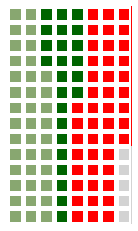

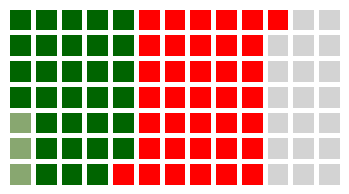

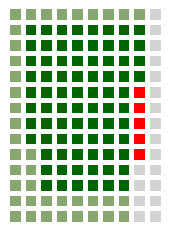

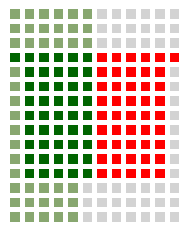

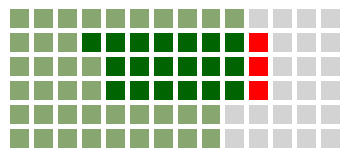

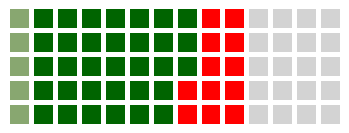

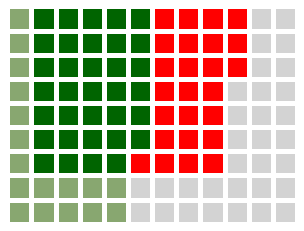

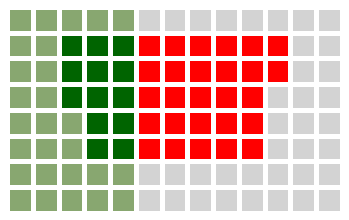

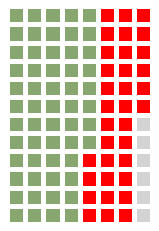

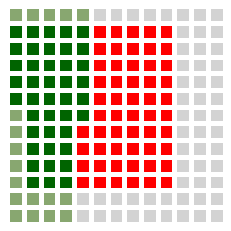

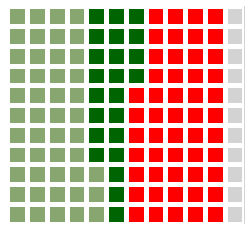

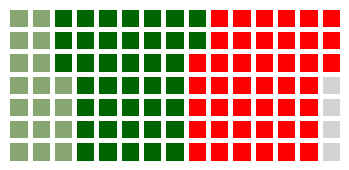

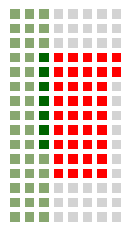

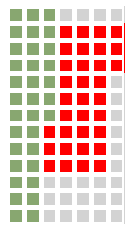

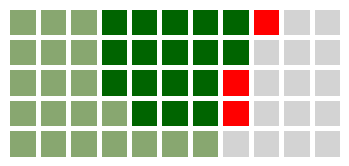

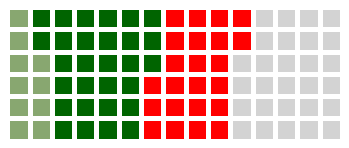

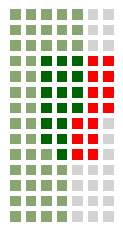

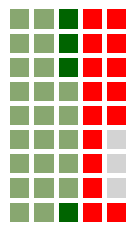

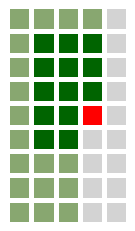

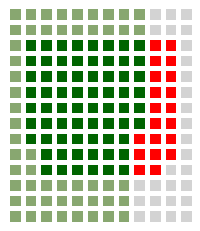

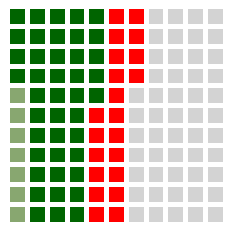

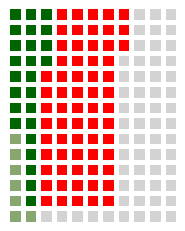

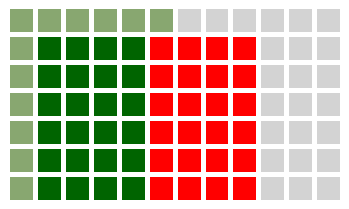

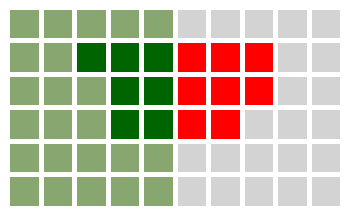

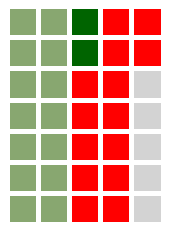

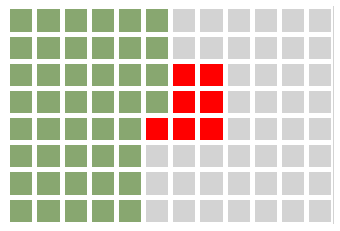

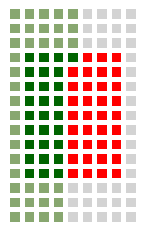

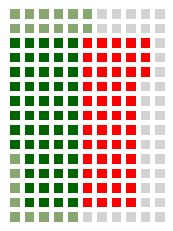

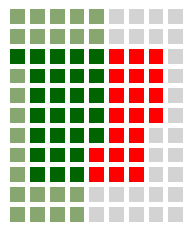

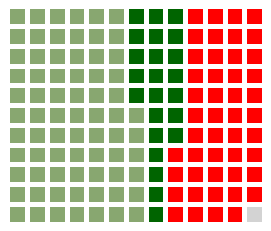

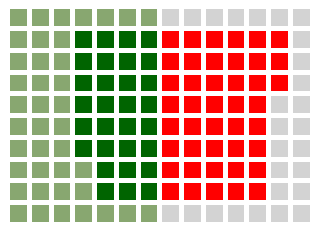

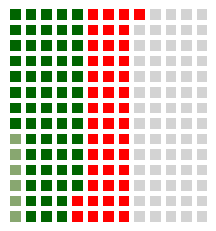

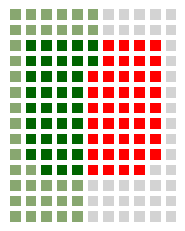

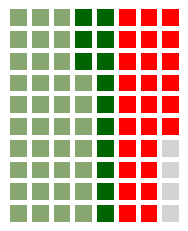

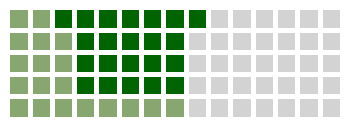

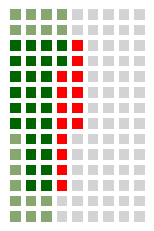

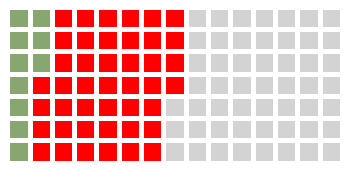

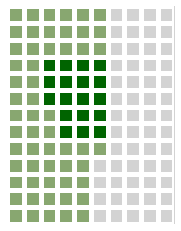

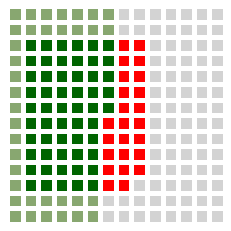

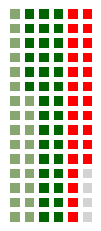

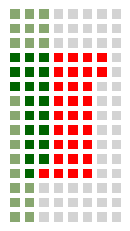

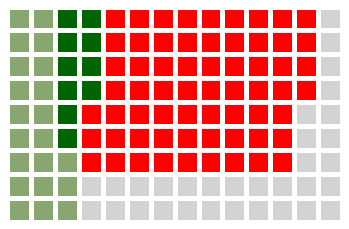

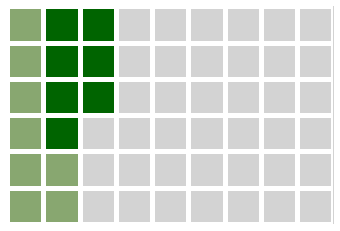

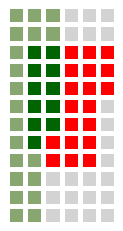

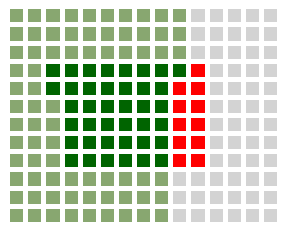

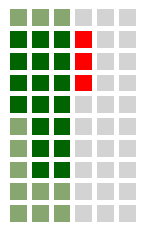

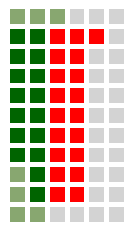

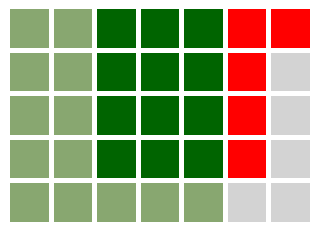

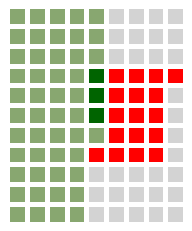

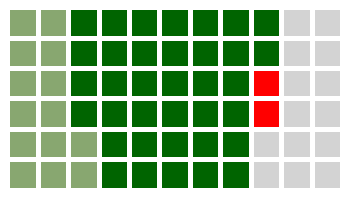

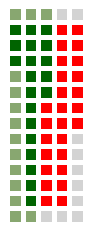

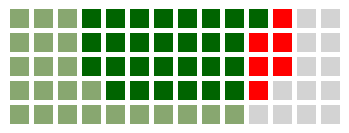

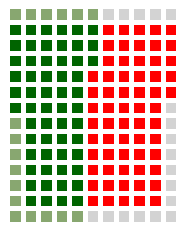

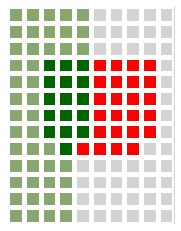

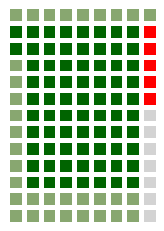

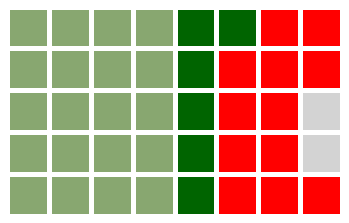

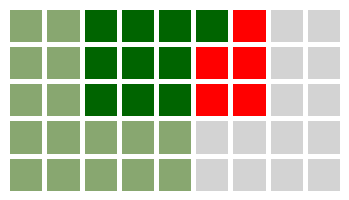

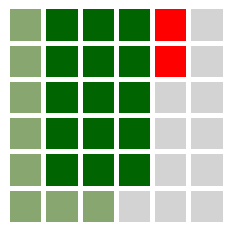

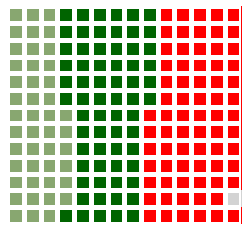

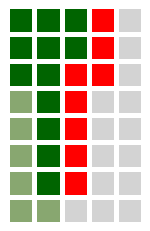

In [220]:
import random
random.seed(3)
rng = np.random.default_rng(seed=42)

def test_build_waffle_matrix(cols, rows, cm):
    hmap = build_waffle_matrix( (rows, cols), cm)
    plot_waffle_matrix(hmap)
    tn, fp, fn, tp = cm.ravel()
    values, counts = np.unique(hmap, return_counts=True)
    result_counts = [0] * 4
    for v, c in zip(values, counts):        
        result_counts[int(v)-1] = c
        
    ordered_vector = [fn, tp, fp, tn]
    normalized_vect =  ordered_vector / sum(ordered_vector) * cols * rows

    print(normalized_vect)
    print(result_counts)
    print(f"counts sum = {sum(result_counts)} - cols x rows = { cols * rows} ")
    max_error = np.max(np.abs(normalized_vect - result_counts))    
    assert max_error < 2.0, f" max_error = {max_error}"

for i in range(60):
    cols = random.randint(5, 15)
    rows = random.randint(5, 15)
    print( (rows, cols))
    cm = rng.integers(low=0, high=15, size=(2, 2))
    print(cm)
    
    test_build_waffle_matrix(cols, rows, cm)
    

In [189]:
cm


array([[ 6, 12],
       [ 1, 10]])

In [ ]:
max( tp/col_part, fp / (cols - col_part))

In [ ]:
(tp/col_part, fp / (cols - col_part))

In [ ]:
col_part